In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [6]:
data = pd.read_csv(f"movies.csv")

In [8]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# Cleaning the Data
# check if there any missing value 

In [14]:
for i in data.columns:
    pct_missing = np.mean(data[i].isnull())*100
    print(f"{i} - {pct_missing : .2f}%")

name -  0.00%
rating -  1.00%
genre -  0.00%
year -  0.00%
released -  0.03%
score -  0.04%
votes -  0.04%
director -  0.00%
writer -  0.04%
star -  0.01%
country -  0.04%
budget -  28.31%
gross -  2.46%
company -  0.22%
runtime -  0.05%


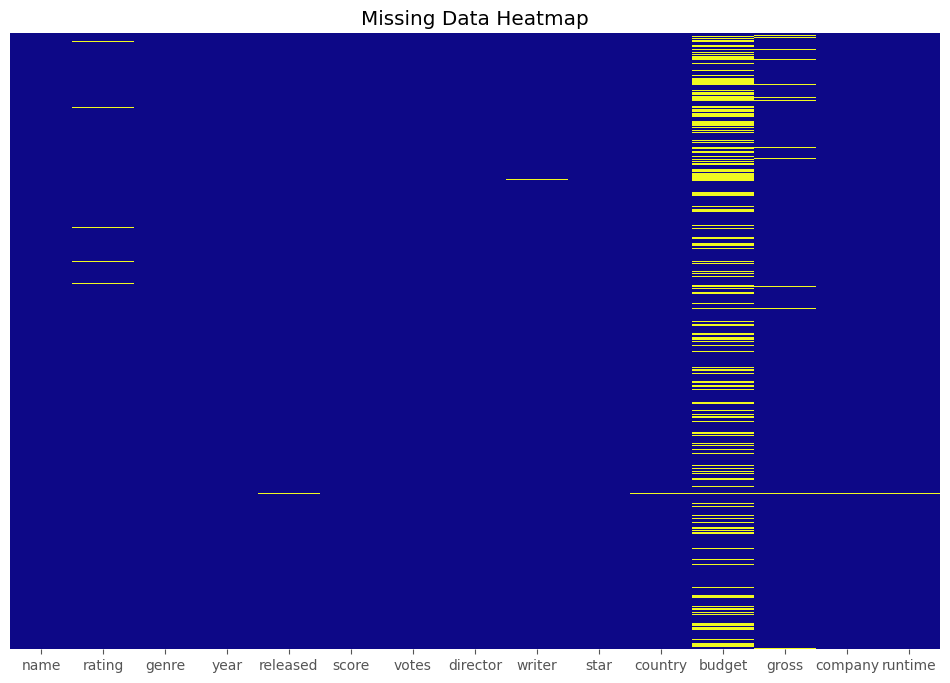

In [16]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='plasma') #cbar and yticklabels define the Aesthetics of the Graph
plt.title("Missing Data Heatmap") #and cmap means colormap which define the color of the graph i.e. plasma there are many more options too that is viridis, inferno, magma etc
plt.show()

In [18]:
# now there are multiple missing values in budget. we can not make an estimate for the budget as budget is an subjective for movie

In [20]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
data = data.dropna() #Here we do not make another dataframe but modift the existing one 'data'

In [24]:
for i in data.columns:
    pct_nan =np.mean(data[i].isnull())
    print(f"{i} - {pct_nan}%") # There is now 0% of missing values in data 

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


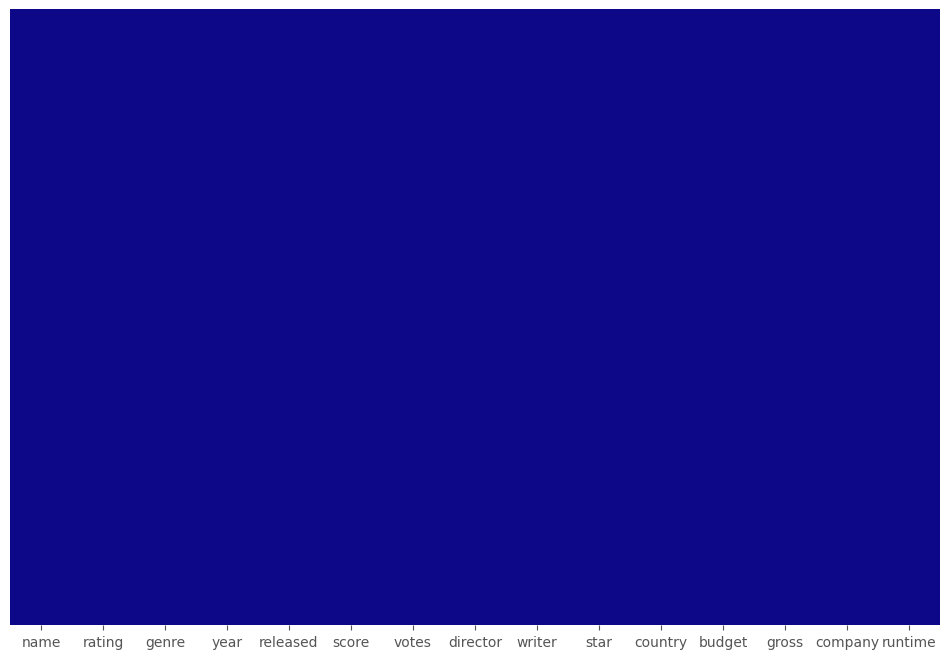

In [26]:
sns.heatmap(data.isnull(), cbar = False, yticklabels = False , cmap= 'plasma')
plt.show()

In [28]:
# There is no Null Values in the DATA

In [30]:
data.sort_values(by = ['gross'], inplace = False , ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [32]:
# Check the duplicates

In [34]:
dup = data.duplicated().sum()

In [36]:
print(dup) #NO Duplicates in the DATA

0


In [38]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [40]:
# Now we will check the which thing plays a most significant role in the Gross Revenue 
# of the Movie

In [42]:
# Scatter plot with Budget vs gross

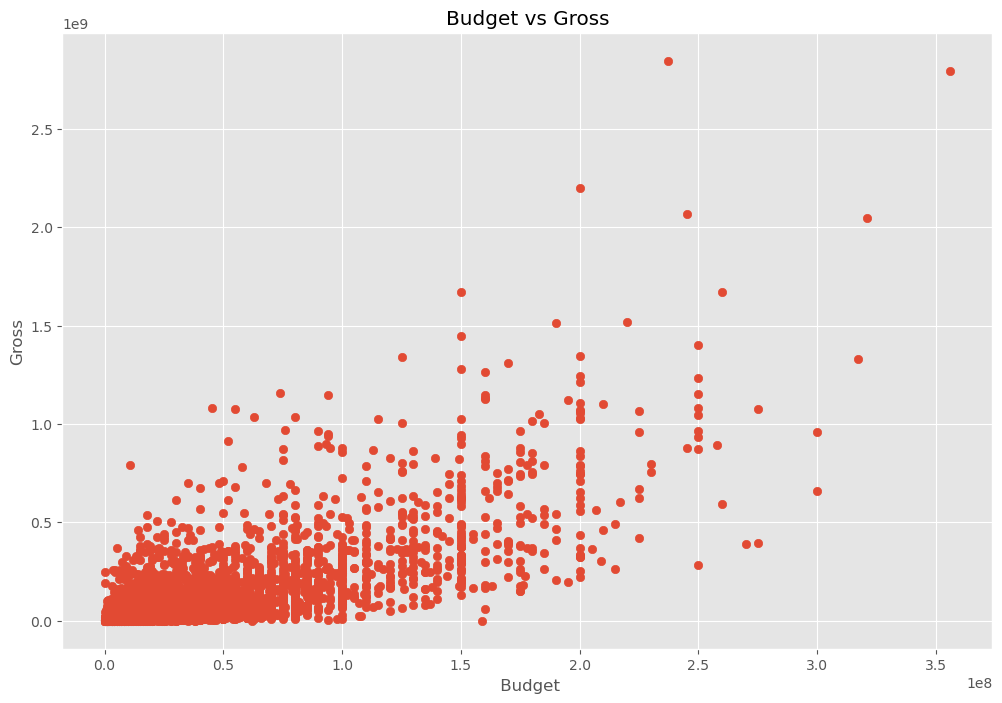

In [44]:
plt.scatter(x = data['budget'], y = data['gross'])
plt.title("Budget vs Gross")
plt.xlabel (" Budget")
plt.ylabel("Gross")
plt.show()

In [48]:
#Regression Plot (Budget vs gross)

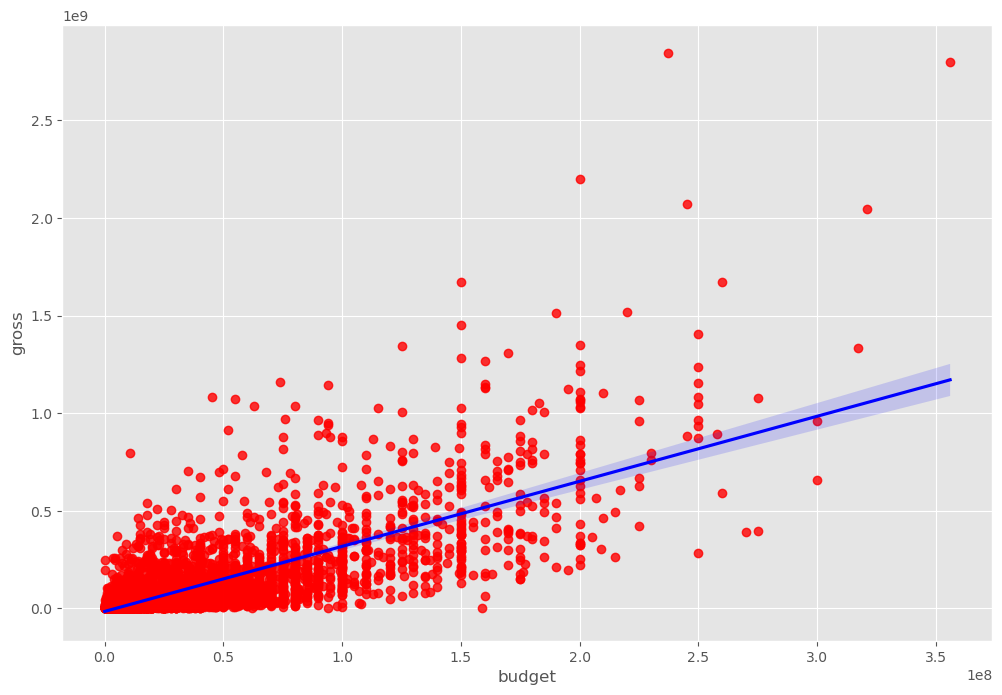

In [68]:
sns.regplot(x = 'budget', y = 'gross', data = data, scatter_kws = {"color":"Red"}, line_kws = {"color" :"Blue"})
plt.show()

In [70]:
# Lest start look at correlation

In [84]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


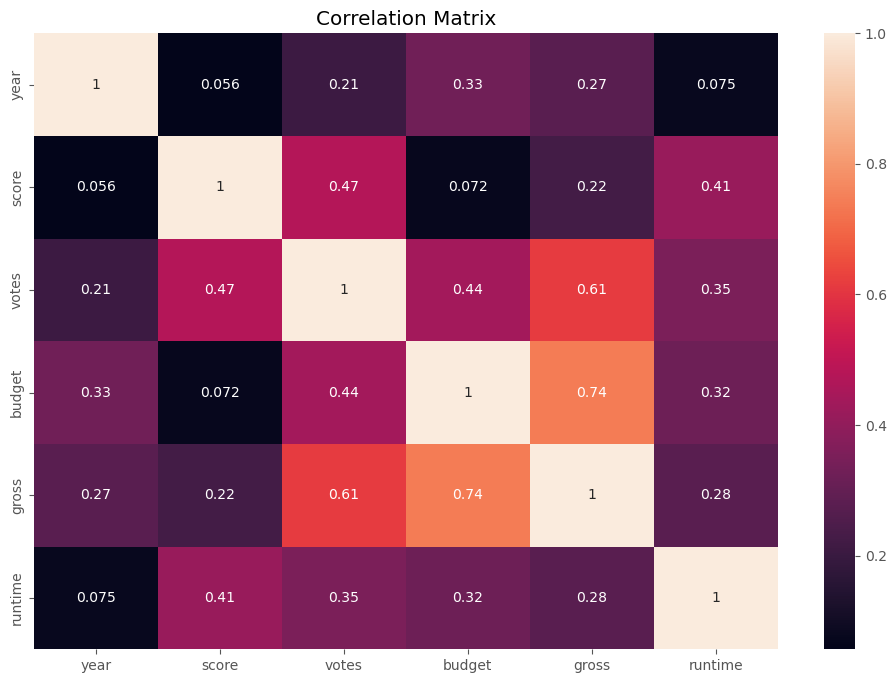

In [88]:
sns.heatmap(correlation_matrix, annot = True)
plt.title ("Correlation Matrix")
plt.show()

In [90]:
# look at Company

In [92]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [94]:
# here company names are in string so we make it as a numeric data type

In [108]:
data_numerized = data

for col_name in data_numerized.columns:
    if(data_numerized[col_name].dtype=='object'):
        data_numerized[col_name] =data_numerized[col_name].astype('category')
        data_numerized[col_name] =data_numerized[col_name].cat.codes

data_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0


In [110]:
# it gives numeric codes to the Data in the DATA

In [118]:
data_numerized.dtypes

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget      float64
gross       float64
company       int16
runtime     float64
dtype: object

In [120]:
correlation_matrix_data = data_numerized.select_dtypes(include=['number']).corr()
print(correlation_matrix_data)

              name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross     0.005639 -0.181906 -0.244101  0.274321  0.008501  0.22

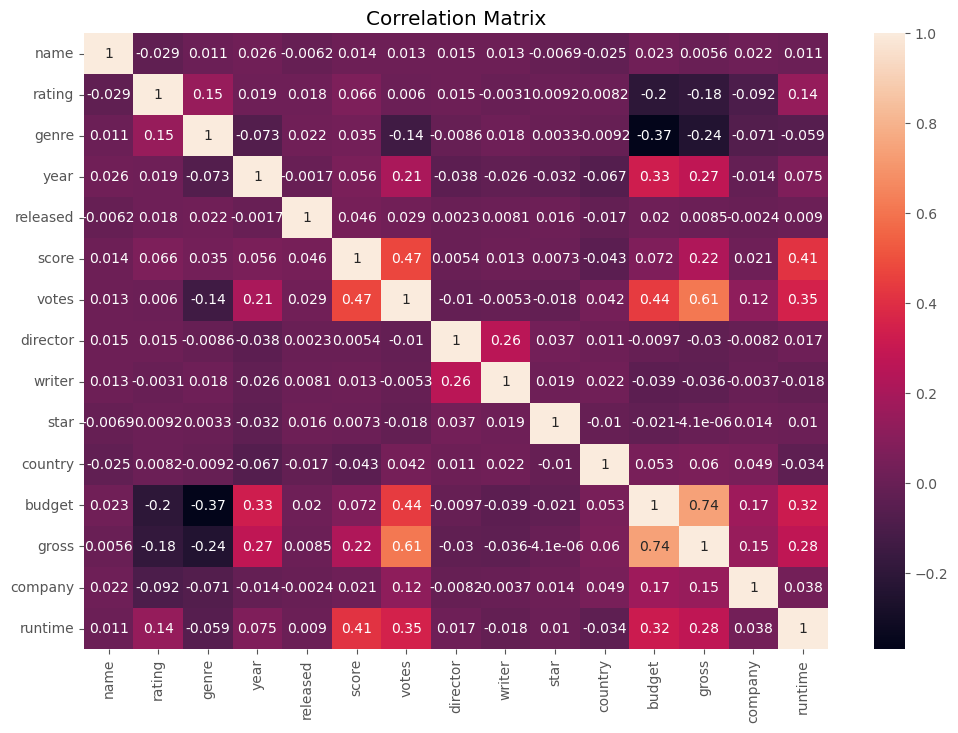

In [122]:
sns.heatmap(correlation_matrix_data, annot = True)
plt.title ("Correlation Matrix")
plt.show()

In [219]:
data_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


In [ ]:
# Unstacing

In [225]:
correlation_mat = data_numerized.corr()
corr_pairs = correlation_mat.unstack()

In [241]:
for i, m in corr_pairs.items():
    print(f"{i}:{m}")

('name', 'name'):1.0
('name', 'rating'):-0.029234051721723747
('name', 'genre'):0.010995540457401047
('name', 'year'):0.025542458129694537
('name', 'released'):-0.006152149315940082
('name', 'score'):0.014450360916825809
('name', 'votes'):0.012615439410107605
('name', 'director'):0.015245981178802418
('name', 'writer'):0.012880167278239457
('name', 'star'):-0.0068823924240723105
('name', 'country'):-0.025489661294854124
('name', 'budget'):0.023392477869551582
('name', 'gross'):0.005638691094639441
('name', 'company'):0.0216970211257973
('name', 'runtime'):0.010850347821577512
('rating', 'name'):-0.029234051721723747
('rating', 'rating'):1.0
('rating', 'genre'):0.1477957226532101
('rating', 'year'):0.01949862427837897
('rating', 'released'):0.01808346926358698
('rating', 'score'):0.0659827830009088
('rating', 'votes'):0.006031202977711493
('rating', 'director'):0.014656082256050985
('rating', 'writer'):-0.0031493501101983955
('rating', 'star'):0.00919640038911427
('rating', 'country'):0

In [243]:
sorted_paris = corr_pairs.sort_values()

In [249]:
for i, m in sorted_paris.items():
    print(f"{i} : {m}")

('budget', 'genre') : -0.36852264931321643
('genre', 'budget') : -0.36852264931321643
('genre', 'gross') : -0.24410053673929893
('gross', 'genre') : -0.24410053673929893
('budget', 'rating') : -0.2039464440386518
('rating', 'budget') : -0.2039464440386518
('rating', 'gross') : -0.18190555213667756
('gross', 'rating') : -0.18190555213667756
('genre', 'votes') : -0.13598955433332702
('votes', 'genre') : -0.13598955433332702
('company', 'rating') : -0.09235681051228513
('rating', 'company') : -0.09235681051228513
('genre', 'year') : -0.07316742690723127
('year', 'genre') : -0.07316742690723127
('genre', 'company') : -0.07133431095093695
('company', 'genre') : -0.07133431095093695
('year', 'country') : -0.06674776274097756
('country', 'year') : -0.06674776274097756
('genre', 'runtime') : -0.059236617887302806
('runtime', 'genre') : -0.059236617887302806
('country', 'score') : -0.043051178087747784
('score', 'country') : -0.043051178087747784
('budget', 'writer') : -0.03946594502184956
('wr

In [251]:
high_correlation = sorted_paris[(sorted_paris)>0.5]

In [255]:
for i, m in high_correlation.items():
    print(f"{i} : {m}")

('votes', 'gross') : 0.6147512368504809
('gross', 'votes') : 0.6147512368504809
('gross', 'budget') : 0.7402465439219639
('budget', 'gross') : 0.7402465439219639
('name', 'name') : 1.0
('director', 'director') : 1.0
('gross', 'gross') : 1.0
('budget', 'budget') : 1.0
('country', 'country') : 1.0
('star', 'star') : 1.0
('writer', 'writer') : 1.0
('votes', 'votes') : 1.0
('score', 'score') : 1.0
('released', 'released') : 1.0
('year', 'year') : 1.0
('genre', 'genre') : 1.0
('rating', 'rating') : 1.0
('company', 'company') : 1.0
('runtime', 'runtime') : 1.0


In [257]:
# Votes and Budget has the Highest Coorelation to Gross Earning